In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  collections import Counter
from datetime import datetime
from wordcloud import WordCloud

In [ ]:
netflix_df = pd.read_csv('netflix_titles.csv', encoding='latin-1')

In [ ]:
netflix_df.head()

In [ ]:
summary = netflix_df.describe()
print(summary)

In [ ]:
netflix_df.info()

In [ ]:
netflix_df.isnull().sum()

In [ ]:
empty_director = netflix_df[netflix_df['director'].isnull()]
print(empty_director)

In [ ]:
cols = ['director', 'cast', 'country']

netflix_df[cols] = netflix_df[cols].fillna('Unknown')
print(netflix_df[cols])
# fill in  mode
netflix_df['date_added'].fillna(netflix_df['date_added'].mode()[0],inplace=True)
netflix_df['rating'].fillna(netflix_df['rating'].mode()[0],inplace=True)
for i in netflix_df.index:
    if netflix_df.loc[i, 'rating']== 'UR':
        netflix_df.loc[i,'rating']= 'NR'
#drop row with missing values
netflix_df=netflix_df.dropna(subset=['duration'])



In [ ]:
netflix_df.head()

In [ ]:
# Check for duplicate rows
duplicate_rows = netflix_df[netflix_df.duplicated()]

print(duplicate_rows)

In [ ]:
netflix_df = netflix_df.iloc[0:8808:]

In [ ]:
netflix_df.drop_duplicates()

In [ ]:
# Create separate DataFrames for TV Shows and Movies
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show']
print(tv_shows_df)

In [ ]:
movies_df = netflix_df[netflix_df['type'] == 'Movie']
print(movies_df)

In [ ]:
# transfer to datetime type
netflix_df['duration_mins']=netflix_df[netflix_df['type']=='Movie']['duration'].str.extract('(\d+)').astype(float)
netflix_df['duration_seasons']=netflix_df[netflix_df['type']=='TV Show']['duration'].str.extract('(\d+)').astype(float)
#NaN values replace with 0
netflix_df[['duration_mins', 'duration_seasons']]= netflix_df[['duration_mins', 'duration_seasons']].fillna(0)
#drop the  duration column
netflix_df=netflix_df.drop('duration', axis=1)


In [ ]:
netflix_df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fill NaN values in 'duration_mins' column with zeros
netflix_df['duration_mins'].fillna(0, inplace=True)

# Create a box plot for movie durations (duration_mins)
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='duration_mins', data=netflix_df)
plt.xlabel('Content Type')
plt.ylabel('Duration (minutes)')
plt.title('Box Plot of Movie Durations')
plt.show()

In [ ]:
# Convert 'date_added' to datetime if not already
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Group by year and count the number of content additions
content_by_year = netflix_df.groupby(netflix_df['date_added'].dt.year)['show_id'].count()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(content_by_year.index, content_by_year.values, marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.title('Netflix Content Additions Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Count the number of movies and TV shows
content_counts = netflix_df['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Proportion of Movies and TV Shows on Netflix')
plt.show()

In [ ]:
#top  directors
director_list=netflix_df.director.str.split(',').sum()
director_counter=Counter(director_list)
top_5_directors=director_counter.most_common(6)
#top casts
cast_list=netflix_df.cast.str.split(',').sum()
cast_counter=Counter(cast_list)
top_5_cast= cast_counter.most_common(6)

df_top_5_cast=pd.DataFrame(top_5_cast, columns= ['cast', 'count'])
df_top_5_cast= df_top_5_cast.loc[df_top_5_cast['cast']!='Unknown']
df_top_5_directors=pd.DataFrame(top_5_directors, columns=['director', 'count'])
df_top_5_directors=df_top_5_directors.loc[df_top_5_directors['director']!='Unknown']

sns.set_theme(style= "whitegrid")
fig, ax = plt.subplots(1,2, figsize=(20,8))

#plot visuls
sns.barplot(x ='count', y = 'cast', data= df_top_5_cast, palette='Greens_d', ax=ax[0])
ax[0].set_title('5 Most Popular Cast')
sns.barplot(x='count', y= 'director', data=df_top_5_directors, palette='Greens_d', ax=ax[1])
ax[1].set_title('5 Most Popular Directors')

plt.tight_layout()
plt.show()

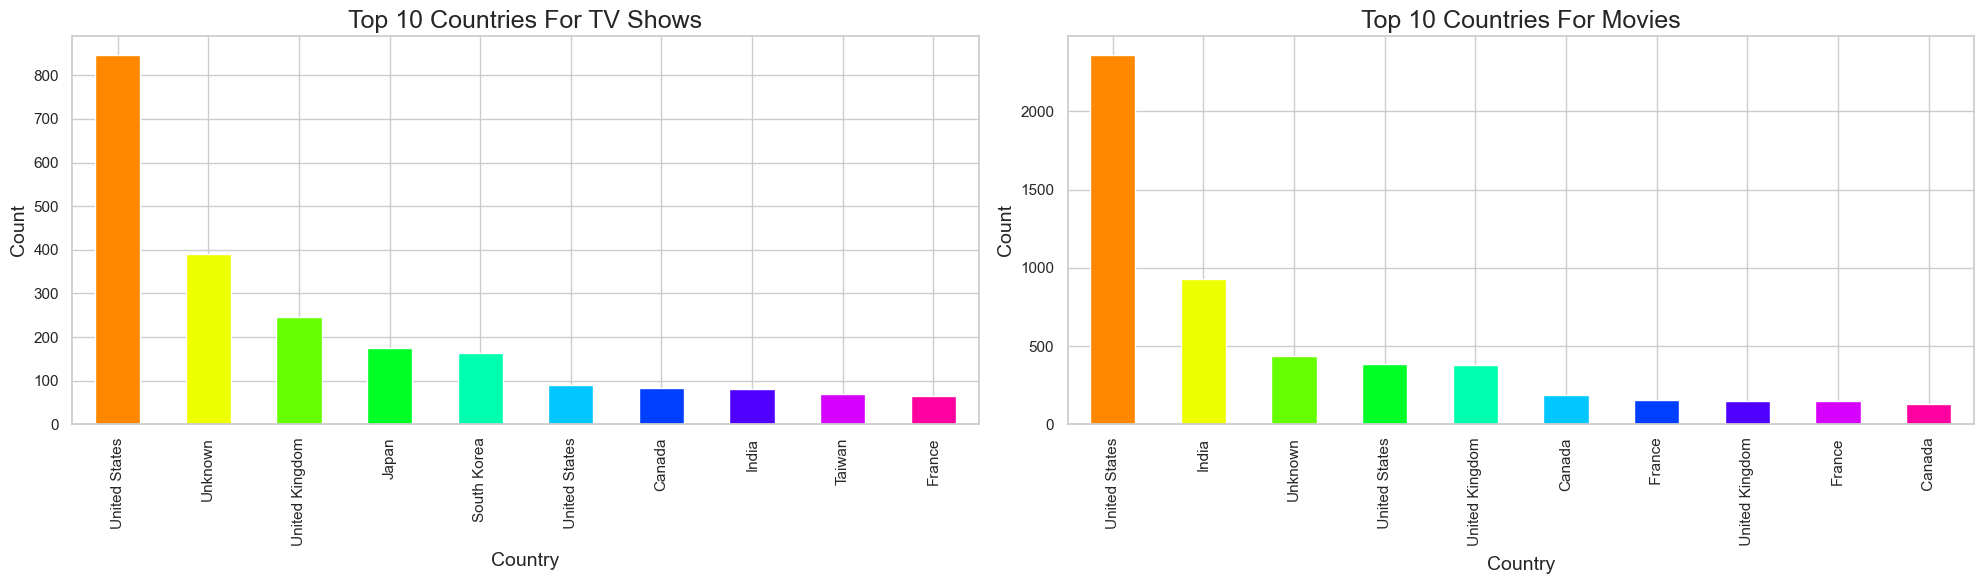

In [24]:
split_countries=netflix_df.assign(country=netflix_df['country'].str.split(',')).explode('country')
split_country_counts=split_countries.groupby(['country', 'type']).size().unstack()

#top 10 countries for Tv Shows and Movies
top_split_countries_tv_shows=split_country_counts['TV Show'].sort_values(ascending= False).head(10)
top_split_countries_movies=split_country_counts['Movie'].sort_values(ascending=False).head(10)


fig, axes= plt.subplots(ncols=2, figsize = (20, 6))


colors= sns.color_palette('hsv', 10)
top_split_countries_tv_shows.plot(kind='bar', ax=axes[0],color=colors)
axes[0].set_title('Top 10 Countries For TV Shows', fontsize=18)
axes[0].set_xlabel('Country', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

top_split_countries_movies.plot(kind='bar', ax=axes[1],color=colors)
axes[1].set_title('Top 10 Countries For Movies', fontsize=18)
axes[1].set_xlabel('Country', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()

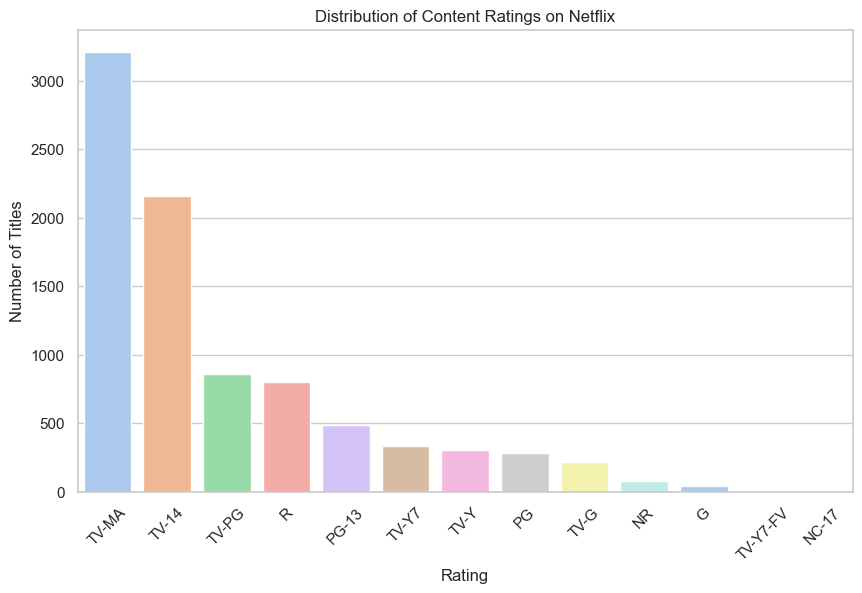

In [21]:
# Count the number of titles for each rating
rating_counts = netflix_df['rating'].value_counts()

# Create a bar chart to visualize the rating distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


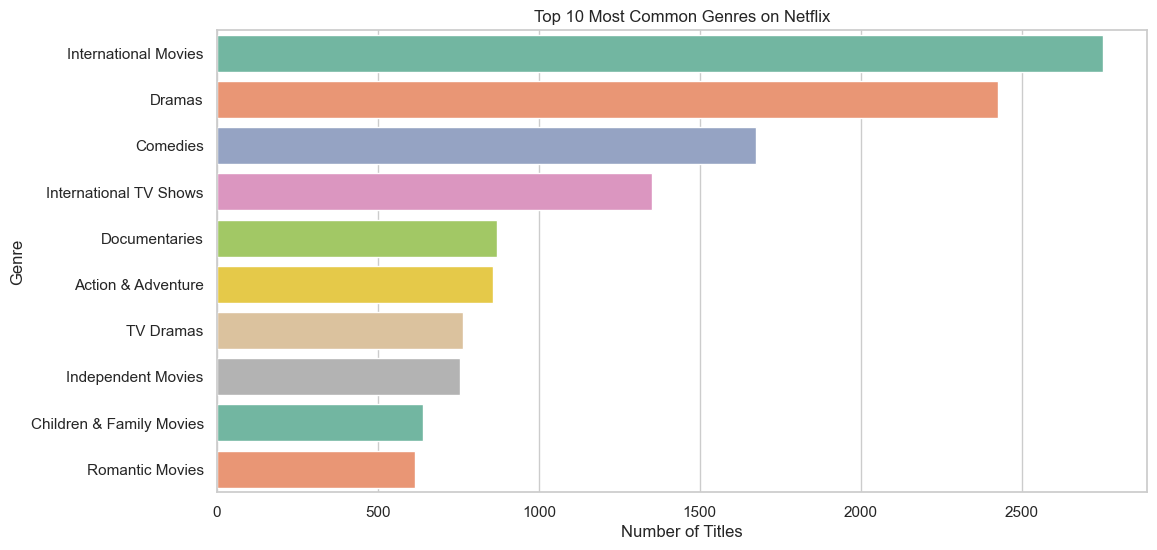

In [27]:
# Create a bar chart to visualize the most common genres
plt.figure(figsize=(12, 6))
top_genres = netflix_df['listed_in'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set2')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
